In [1]:
library(repr)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [2]:
ckd_data <- read_csv("https://raw.githubusercontent.com/callen02/DSCI100_Group_25_Project/main/ckd_clean.csv")
names(ckd_data) <- gsub(" ", ".", names(ckd_data))
#filtered out columns that are non numeric
ckd_data_tidy <- ckd_data %>% 
            mutate(Class = as_factor(Class)) %>%
            select(-Red.Blood.Cells, -Pus.Cell, -Pus.Cell.clumps, -Bacteria, -Hypertension, -Diabetes.Mellitus, -Appetite, -Pedal.Edema, -Coronary.Artery.Disease, - Anemia)
ckd_data_tidy

Parsed with column specification:
cols(
  .default = col_double(),
  `Red Blood Cells` = col_character(),
  `Pus Cell` = col_character(),
  `Pus Cell clumps` = col_character(),
  Bacteria = col_character(),
  Hypertension = col_character(),
  `Diabetes Mellitus` = col_character(),
  `Coronary Artery Disease` = col_character(),
  Appetite = col_character(),
  `Pedal Edema` = col_character(),
  Anemia = col_character()
)

See spec(...) for full column specifications.



Age,Blood.Pressure,Specific.Gravity,Albumin,Sugar,Blood.Glucose.Random,Blood.Urea,Serum.Creatinine,Sodium,Potassium,Hemoglobin,Packed.Cell.Volume,White.Blood.Cell.Count,Red.Blood.Cell.Count,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
48,70,1.005,4,0,117,56,3.8,111,2.5,11.2,32,6700,3.9,1
53,90,1.020,2,0,70,107,7.2,114,3.7,9.5,29,12100,3.7,1
63,70,1.010,3,0,380,60,2.7,131,4.2,10.8,32,4500,3.8,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
12,80,1.020,0,0,100,26,0.6,137,4.4,15.8,49,6600,5.4,0
17,60,1.025,0,0,114,50,1.0,135,4.9,14.2,51,7200,5.9,0
58,80,1.025,0,0,131,18,1.1,141,3.5,15.8,53,6800,6.1,0


##### First, to decide what variables were suitable to utilize for our classification problem, we used ggpairs from the GGally package, in order to vizualize and evaluate the distributions and correlations of the variables with CKD. Due to the data set containing 10+ variables, we split the data into 2 parts so we could better visualize the different plots. #####

In [3]:
#Importing package GGally

install.packages ("GGally")
library (GGally)

#Splitting ckd_data_tidy in 2

ckd_data_tidy_1 <- select (ckd_data_tidy,
                            Age: Blood.Urea, Class)

#ckd_data_tidy_1

ckd_data_tidy_2 <- select (ckd_data_tidy, Serum.Creatinine:Class)

#ckd_data_tidy_2


also installing the dependencies ‘rlang’, ‘ggplot2’


Warning message in install.packages("GGally"):
“installation of package ‘GGally’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



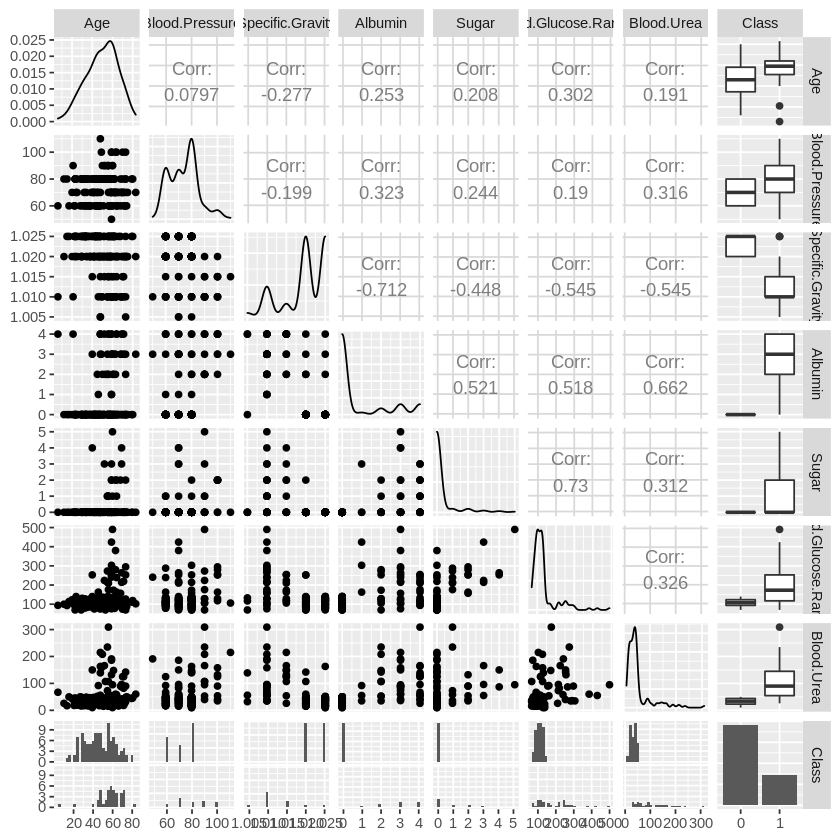

In [4]:
#ggpairs for ckd_data_tidy_1

ggpairs (ckd_data_tidy_1)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



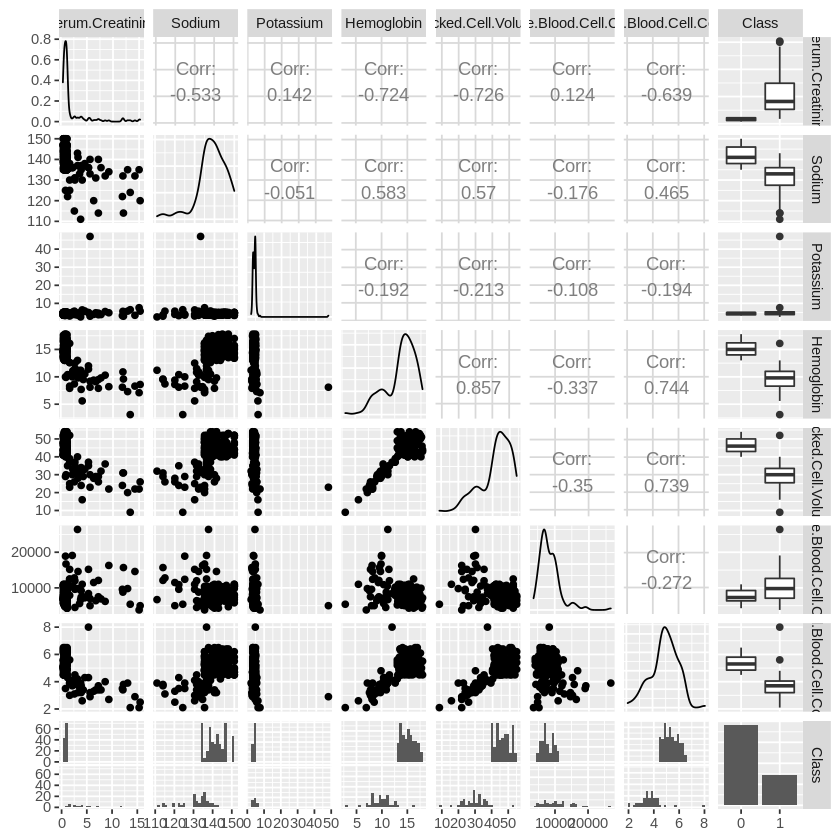

In [5]:
#ggpairs for ckd_data_tidy_2

ggpairs (ckd_data_tidy_2)


##### Based on the box plots above, we utilized the 3 variables that had the highest distribution/correlation towards Class = 1 (having CKD) to calculate the r value (point biserial correlation) for Serum.Creatinine, Blood.Pressure and Albumin. #####

In [6]:
#Correlation test for Serum.Creatinine:

#Convert categorical to numerical
ckd_data_tidy$Class2 <- ifelse(ckd_data_tidy$Class==1, 1, 0)

#correlation test
cor.test(ckd_data_tidy$Serum.Creatinine, ckd_data_tidy$Class2)


	Pearson's product-moment correlation

data:  ckd_data_tidy$Serum.Creatinine and ckd_data_tidy$Class2
t = 12.319, df = 156, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6133113 0.7735344
sample estimates:
      cor 
0.7022065 


In [7]:
#Correlation test for Blood.Pressure:

#Convert categorical to numerical
ckd_data_tidy$Class2 <- ifelse(ckd_data_tidy$Class==1, 1, 0)

#correlation test
cor.test(ckd_data_tidy$Blood.Pressure, ckd_data_tidy$Class2)


	Pearson's product-moment correlation

data:  ckd_data_tidy$Blood.Pressure and ckd_data_tidy$Class2
t = 4.3154, df = 156, p-value = 2.818e-05
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1795838 0.4592882
sample estimates:
      cor 
0.3265671 


In [8]:
#Correlation test for Albumin:

#Convert categorical to numerical
ckd_data_tidy$Class2 <- ifelse(ckd_data_tidy$Class==1, 1, 0)

#correlation test
cor.test(ckd_data_tidy$Albumin, ckd_data_tidy$Class2)


	Pearson's product-moment correlation

data:  ckd_data_tidy$Albumin and ckd_data_tidy$Class2
t = 30.593, df = 156, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8997398 0.9453057
sample estimates:
      cor 
0.9258162 


##### Based on these correlation values, we decided to utilize these three variables when making our recipe, by selecting Blood.Pressure, Albumin, Serum.Creatinine and our factor Class. We choose these 3 variables because they had the highest correlation when we used the ggpairs function. Next we split our data into training and testing data using a 75/25 split. #####

In [9]:
#training and testing data, # class means whether they have CKD or not. 1 = Yes, 0 = No
set.seed(123)
ckd_chose_var <- ckd_data_tidy %>%
            select(Blood.Pressure, Albumin,Serum.Creatinine,Class)

ckd_split <- initial_split(ckd_chose_var, prop = 0.75, strata = Class)
ckd_training <- training(ckd_split)
ckd_testing <- testing(ckd_split)

ckd_training
ckd_testing

Blood.Pressure,Albumin,Serum.Creatinine,Class
<dbl>,<dbl>,<dbl>,<fct>
70,4,3.8,1
90,2,7.2,1
70,3,2.7,1
⋮,⋮,⋮,⋮
80,0,0.6,0
60,0,1.0,0
80,0,1.1,0


Blood.Pressure,Albumin,Serum.Creatinine,Class
<dbl>,<dbl>,<dbl>,<fct>
70,3,2.7,1
80,2,4.6,1
60,1,3.3,1
⋮,⋮,⋮,⋮
80,0,0.9,0
80,0,0.8,0
70,0,1.2,0


##### Next we made our recipe for data. We made sure to use our 3 variables as predictors and standardize our data. #####

In [10]:
#Recipe with selection of predictors; Blood.Pressure, Albumin, and Serum.Creatinine
ckd_recipe <- recipe(Class ~ Blood.Pressure + Albumin + Serum.Creatinine, data = ckd_training) %>%
            step_scale(all_predictors()) %>%
            step_center(all_predictors())
#ckd_recipe

##### Following completion of the recipe, we create our model using the classifcation algorithm. We set neighbors = tune() in order to find find the optimimal k value first. Then, we will revise our model by imputting the optimized k value we found. #####

In [11]:
#Model that helps find the optimal K value
ckd_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
       set_engine("kknn") %>%
       set_mode("classification")
#ckd_spec

##### Next we completed 10 fold cross validation on our training data, to ensure that our model is able to effectively predict data other than the set it was trained with. #####

In [12]:
#10 V-fold function
ckd_vfold <- vfold_cv(ckd_training, v = 10, strata = Class)

##### Next we made a workflow function, making sure to add the correct recipe, model, as well as, specifying the workflow to use 10 fold cross validation data. #####

In [13]:
#Workflow 
gridvals <- tibble(neighbors = seq(from = 1, to = 20))
ckd_workflow <- workflow() %>%
            add_recipe(ckd_recipe) %>%
            add_model(ckd_spec) %>%
            tune_grid(resamples = ckd_vfold, grid = gridvals) %>%
            collect_metrics()
            
#ckd_workflow
            

##### Then, we filtered the workflow data for accuracy. #####

In [14]:
#Filter for accuracy
ckd_accuracy <- ckd_workflow %>%
                 filter(.metric == "accuracy")
ckd_accuracy

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.9329837,10,0.01610942,Model01
2,accuracy,binary,0.9420746,10,0.01714322,Model02
3,accuracy,binary,0.9741259,10,0.01322934,Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
18,accuracy,binary,0.9657925,10,0.01401944,Model18
19,accuracy,binary,0.9657925,10,0.01401944,Model19
20,accuracy,binary,0.9657925,10,0.01401944,Model20


##### In order to determine the optimal k-value, we then plotted the number of neighbors(k) vs mean from the ckd_accuracy data. The visualization showed that the accuracy is quite similar for multiple k-values. The highest accuracy is 97.7%. Since we have a smaller dataset, we decided to utilize a smaller k-value that was shown to have high accuracy, and thus, chose 4. #####

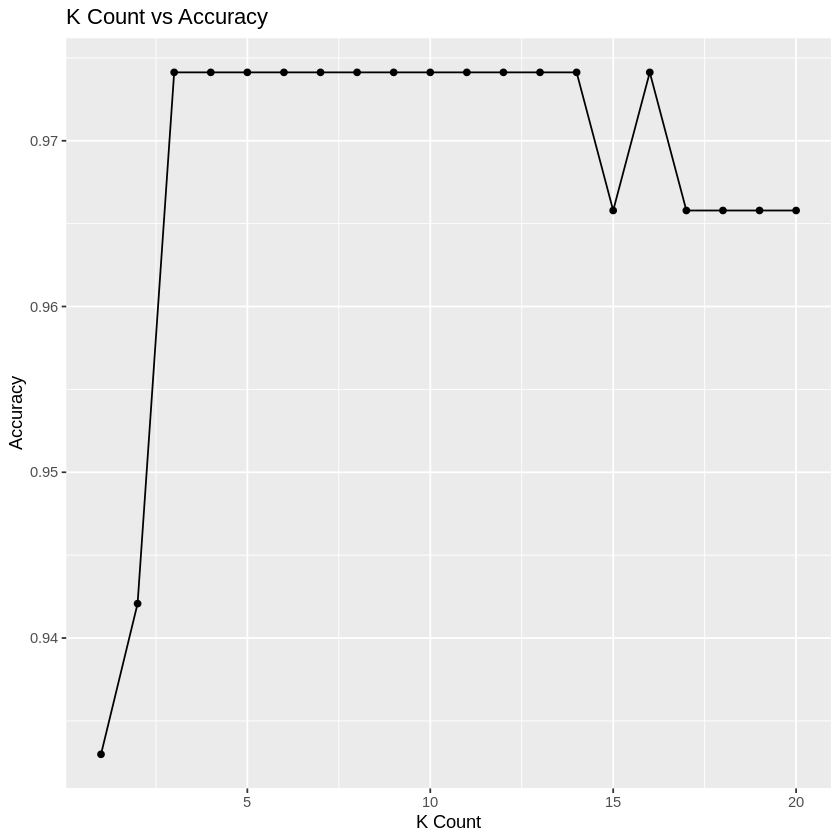

In [15]:
#Plot to find the optimal K
cross_val_plot <- ckd_accuracy %>%
                  ggplot(aes(x= neighbors, y = mean)) +
                  geom_point() +
                  geom_line() +
                  labs(x = "K Count", y = "Accuracy", title = "K Count vs Accuracy")

cross_val_plot

##### We now created a new model which sets the number of neighbors to our chosen k value. ##### 

In [16]:
#Model with optimal k value
ckd_optimal_k <- nearest_neighbor(weight_func = "rectangular", neighbor = 4) %>%
                set_engine("kknn") %>%
                set_mode("classification")

#ckd_optimal_k
            

##### We then created a new workflow with our original recipe, new k model, and fit it with the training data #####

In [17]:
#Fitted Model
ckd_fit <- workflow() %>%
             add_recipe(ckd_recipe) %>%
             add_model(ckd_optimal_k) %>%
             fit(data = ckd_training)

#ckd_fit

##### Finally we predicted our data using the testing data. We bound the predictions to the testing data to see which predictions were correct and incorrect. #####

In [18]:
#Predictions of the testing data
ckd_predictions <- predict(ckd_fit, ckd_testing) %>%
                     bind_cols(ckd_testing)
ckd_predictions

.pred_class,Blood.Pressure,Albumin,Serum.Creatinine,Class
<fct>,<dbl>,<dbl>,<dbl>,<fct>
1,70,3,2.7,1
1,80,2,4.6,1
0,60,1,3.3,1
⋮,⋮,⋮,⋮,⋮
0,80,0,0.9,0
0,80,0,0.8,0
0,70,0,1.2,0


Loading required package: gridExtra


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




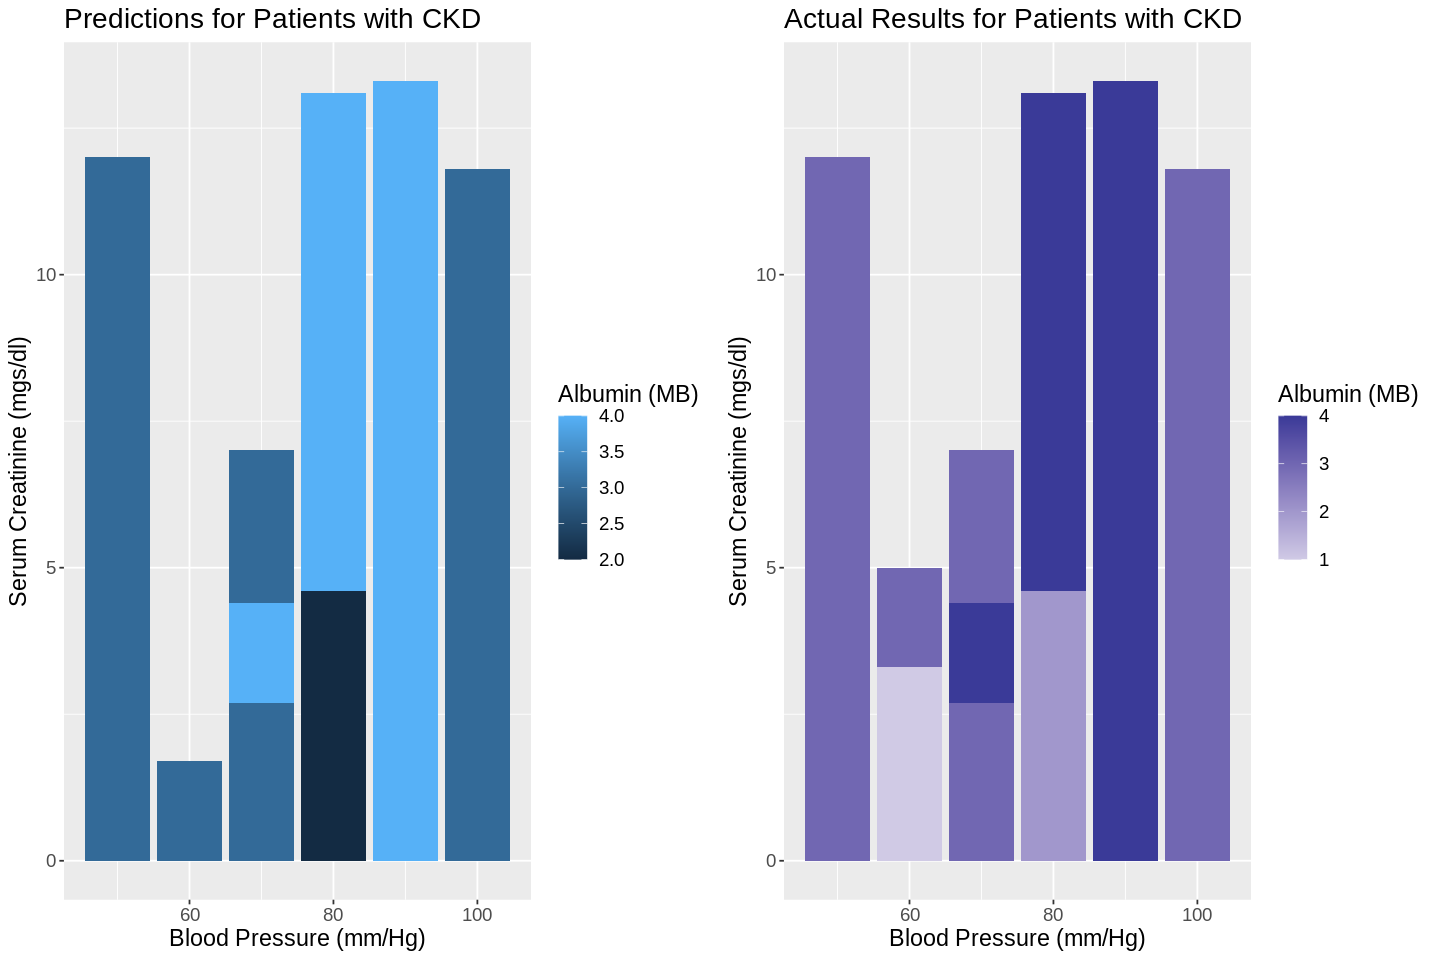

In [19]:
require(gridExtra)

ckd_pred_class <- ckd_predictions %>%
        filter(.pred_class == "1")

ckd_act_class <- ckd_predictions %>%
        filter(Class == "1")

#ckd_pred_class
options(repr.plot.width = 12, repr.plot.height = 8)

ckd_pred_class_plot <- ckd_pred_class %>%
        ggplot(aes(x = Blood.Pressure, y = Serum.Creatinine, fill = Albumin)) +
        geom_bar(stat = "identity") + 
        labs(x = "Blood Pressure (mm/Hg)", y = "Serum Creatinine (mgs/dl)", fill = "Albumin (MB)",
             title = "Predictions for Patients with CKD") +
        theme(text = element_text(size = 14))
#ckd_pred_class_plot

ckd_act_class_plot <- ckd_act_class %>%
        ggplot(aes(x = Blood.Pressure, y = Serum.Creatinine, fill = Albumin)) +
        geom_bar(stat = "identity") +
        labs(x = "Blood Pressure (mm/Hg)", y = "Serum Creatinine (mgs/dl)", fill = "Albumin (MB)", 
             title = "Actual Results for Patients with CKD") +
        theme(text = element_text(size = 14)) +
        scale_fill_gradient2()

grid.arrange(ckd_pred_class_plot, ckd_act_class_plot, ncol=2)

##### This visualization compares our predictions to the actual results for patients with CKD. The predictions possess many similarities to the actual results, showing our chosen variables do possess a strong correlation and ability to predict the class of CKD. One of the only main differences between the visualizations is that the column at 60 Blood Pressure in the predictions is missing a large chunk . This means that the algorithm predicted that chunk to be a patient without CKD, so it is missing from the predictions graph. It is actually supposed to be there so the prediction did have some incorrect classifications. ######

## Discussion ##

#### Summarize what you found ####

 In the cross_val_plot it was found that the optimal K values are between 4 and 14. We decided on using 4 where the accuracy of predictions was around 97.7%, because although having more data to predict increases accuracy and precision, if the K value is too high it can cause underfitting resulting in inaccurate predictions. For this reason and because we have a smaller data set we decided to pick a K value on the lower end of the high accuracy range of K. Although, as shown in our graph there are some mistakes, there are potential sources of error that can account for this so overall the KNN classification analysis was able to accurately detect chronic heart disease.  
 
As for the wrongly predicted classifications, there could be different sources of error. There are a variety of different sources of error that could've resulted in the wrongly predicted classifications. Patient levels of Serum.Creatinine, Blood.Pressure and Albumin were used as predictors for chronic kidney disease, and as previously discussed in the introduction these are good indicators and have medical data supporting their linkage to chronic kidney disease. Despite this, every individual's health is different and these predictors can result in other health problems not related to the kidney. For example, although blood pressure has strong correlation to chronic kidney disease, it can also cause heart disease. In conclusion these predictors are generally useful for classifying chronic kidney disease but there is subjectivity within each patients medical history. 

#### Discuss whether this is what you expected to find? ####

#### Discuss what impact could such findings have? ####
In the medical field, using algorithms and statistics to predict and categorise different forms of illness is very beneficial. The analysis system utilised in this experiment could be used with additional factors, such as fasting blood sugar or chest discomfort, that can forecast cardiac illnesses. KNN classification is an effective method since it makes use of available data to train and make precise predictions. There is a lot of information gathered in the medical sector about various disorders, including heart disease. This analysis approach may be used to forecast various illnesses and, in general, aid in the diagnosis of patients by doctors.

#### Discuss what future questions could this lead to? ####
For future investigations, the basis of KNN classification can be used as well as potentially adding more predictors and classifiers to possibly give us more accurate and informative results on chronic kidney disease.  

## References ##